In [1]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("athlete_events.csv")

In [2]:
df = df[["Year", "Sport", "Team", "Sex", "Event", "Medal","City"]].drop_duplicates()
#df = df[["Year", "Sport", "Country", "Gender", "Event", "Medal"]].drop_duplicates()
df = df.groupby(["Team", "Year"])["Medal"].count().unstack()

In [4]:
countries = [
    "United States", 
    "China", 
    "Russia", 
    "Germany","Canada",
    "Australia", "Japan", 
    "France", 
    "Italy" ,"Great Britain" ,"Soviet Union"   
]
year = [
    1896,1900,1904,1908,1912,1916,1920,1924,1928,1932,1936,1948,1952,
    1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,
    2012,2016
]
sm = df.loc[countries,year]
sm = sm[::-1]


In [6]:

sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.2)
country_colors = {
    "United States":"gray",
    "China":"red",
    "Russia":"yellow", 
    "Germany":"silver","Canada":"lightcoral",
    "Australia":"black", "Japan":"pink", 
    "France":"green",
    "Italy":"yellowgreen","Great Britain":"orange","Soviet Union":"brown"
}

colors = [country_colors[c] for c in sm.index]

from scipy import interpolate

def streamgraph(dfr, **k):
    X = dfr.columns
    xs = np.linspace(dfr.columns[0], dfr.columns[-1], num=1500)
    ys = [interpolate.PchipInterpolator(X, y)(xs) for y in dfr.values]
    return plt.stackplot(xs, ys, labels=dfr.index, **k)

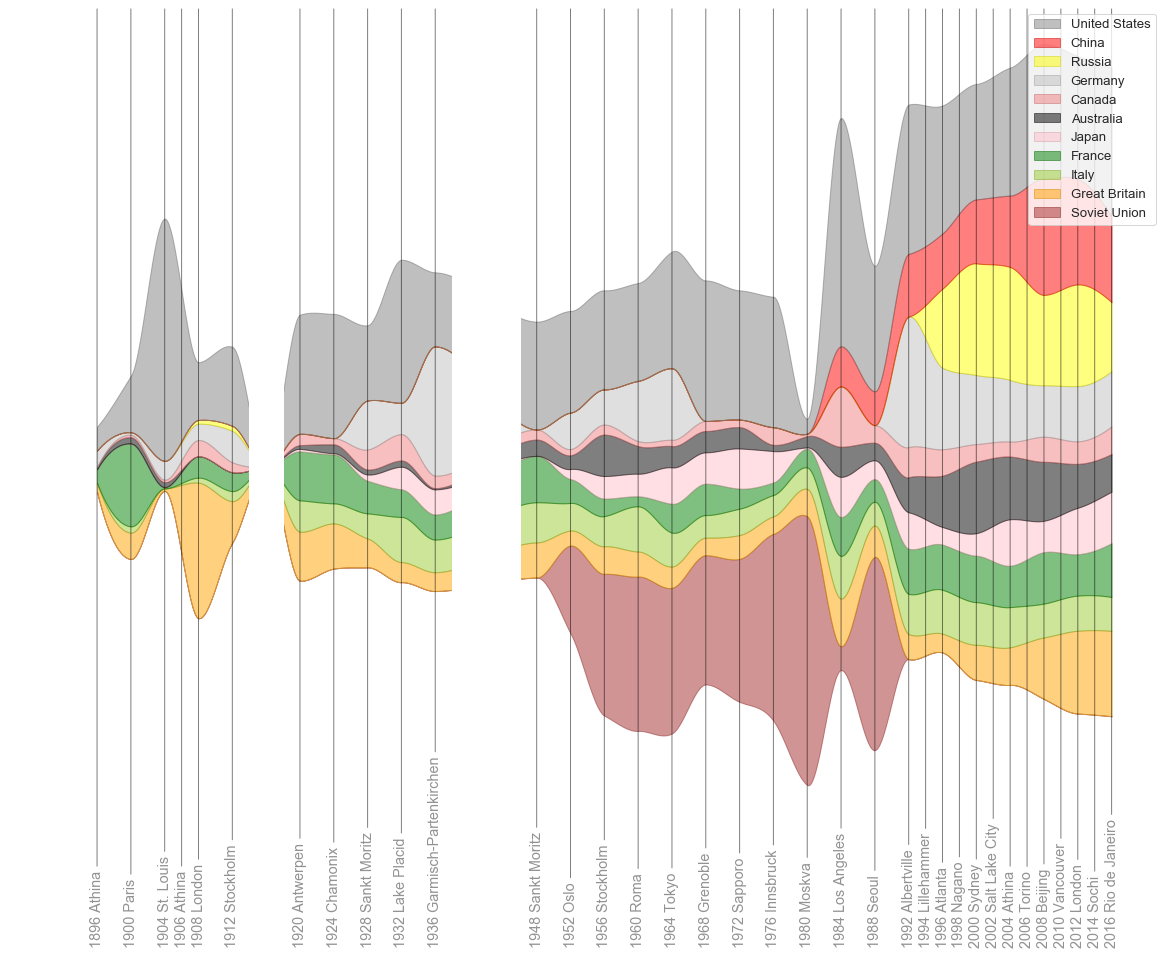

In [8]:
plt.figure(figsize=(20, 15))
sm = sm[sm.columns.sort_values()]
plt.axis('off')

f = streamgraph(sm.fillna(0), colors=colors, baseline="wiggle", alpha=0.5, linewidth=1)
[a.set_edgecolor(sns.dark_palette(colors[i])[-2]) for i,a in enumerate(f)] 

hand, lab = plt.gca().get_legend_handles_labels()
plt.legend(hand[::-1], lab[::-1])

city = pd.read_csv("athlete_events.csv")[["Year", "City"]].drop_duplicates().set_index("Year")["City"].to_dict()
for c in city:
    plt.annotate(xy=(c, plt.ylim()[1]),xytext=(c, plt.ylim()[0]-100), s="{} {}".format(c, city[c]),
    rotation=90,verticalalignment="bottom", horizontalalignment="center", alpha=0.5, zorder=1,
    arrowprops={"arrowstyle":"-", "zorder":0, "color":"k", "alpha":0.5})

    
plt.axvspan(xmin=1914, xmax=1918, color='white')
plt.axvspan(xmin=1938, xmax=1946, color='white')

plt.show()